In [2]:
import pandas as pd

In [3]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [4]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
import seaborn as sbn
import matplotlib.pyplot as plt

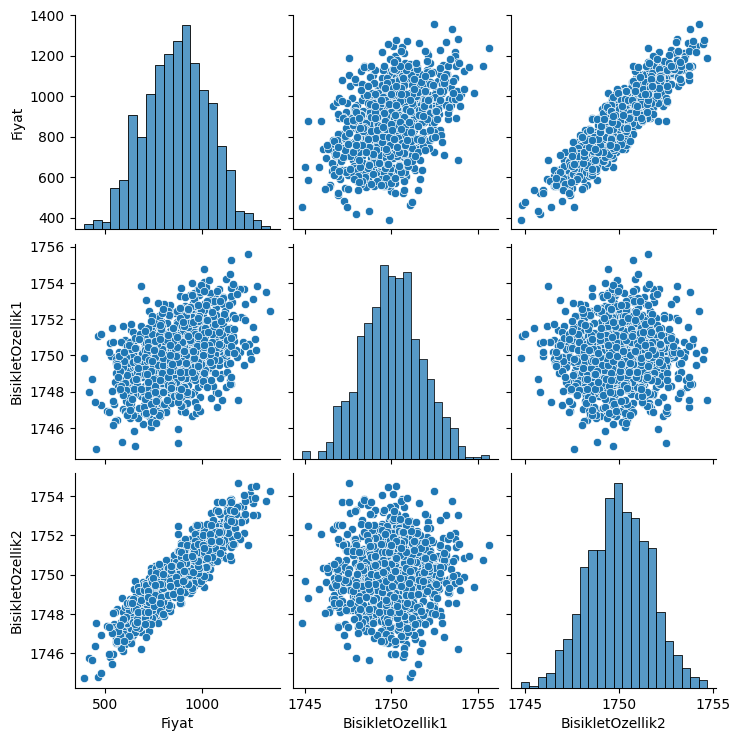

In [8]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#train_test_split

In [11]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [12]:
x_train.shape

(670, 2)

In [13]:
x_test.shape

(330, 2)

In [14]:
y_train.shape

(670,)

In [15]:
y_test.shape

(330,)

In [16]:
#scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(x_train)

MinMaxScaler()

In [23]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

In [28]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795470.7500
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795173.0625
Epoch 3/250
21/21 [==============================] - 0s 992us/step - loss: 794856.6875
Epoch 4/250
21/21 [==============================] - 0s 952us/step - loss: 794509.8750
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 794131.7500
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 793722.2500
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 793279.8750
Epoch 8/250
21/21 [==============================] - 0s 987us/step - loss: 792801.2500
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 792281.2500
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 791719.1875
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 791108.0000
Epoch 12/250
21/21 [==============================] - 0s 

670/670 [==============================] - 0s 48us/sample - loss: 2969.4847
Epoch 181/250
670/670 [==============================] - 0s 46us/sample - loss: 2917.0121
Epoch 182/250
670/670 [==============================] - 0s 44us/sample - loss: 2866.2660
Epoch 183/250
670/670 [==============================] - 0s 44us/sample - loss: 2819.5755
Epoch 184/250
670/670 [==============================] - 0s 45us/sample - loss: 2768.6268
Epoch 185/250
670/670 [==============================] - 0s 42us/sample - loss: 2726.2738
Epoch 186/250
670/670 [==============================] - 0s 42us/sample - loss: 2678.9498
Epoch 187/250
670/670 [==============================] - 0s 43us/sample - loss: 2632.4840
Epoch 188/250
670/670 [==============================] - 0s 44us/sample - loss: 2593.1119
Epoch 189/250
670/670 [==============================] - 0s 45us/sample - loss: 2543.5455
Epoch 190/250
670/670 [==============================] - 0s 44us/sample - loss: 2494.6992
Epoch 191/250
670/670 [=

In [29]:
loss = model.history.history["loss"]

<Axes: >

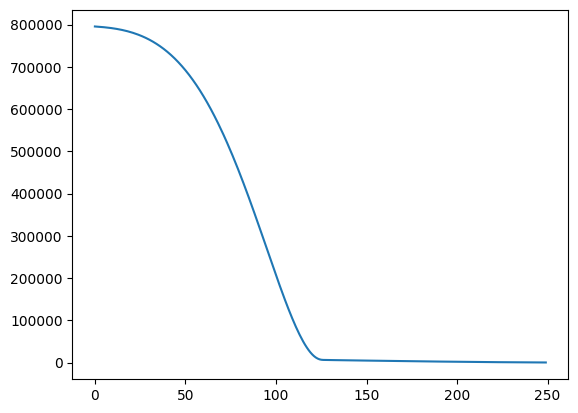

In [30]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [31]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [32]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [33]:
trainLoss

345.14227294921875

In [34]:
testLoss

331.9741516113281

In [35]:
testTahminleri = model.predict(x_test)

11/11 [==============================] - 0s 746us/step


In [36]:
testTahminleri

array([[1060.1836 ],
       [ 652.1179 ],
       [ 879.2715 ],
       [ 892.42444],
       [ 896.6383 ],
       [ 492.09265],
       [ 927.63745],
       [ 981.34845],
       [ 939.5466 ],
       [1004.98486],
       [ 766.7129 ],
       [ 918.2648 ],
       [ 940.8116 ],
       [1039.865  ],
       [1101.7946 ],
       [ 702.73126],
       [1102.0385 ],
       [ 672.8121 ],
       [1126.4832 ],
       [ 888.51434],
       [ 893.51874],
       [ 737.3079 ],
       [ 503.71985],
       [ 637.97614],
       [ 842.88696],
       [1073.3721 ],
       [ 731.6991 ],
       [ 770.36017],
       [ 874.63635],
       [ 782.89386],
       [ 494.8081 ],
       [ 796.07935],
       [ 745.16534],
       [ 670.8129 ],
       [ 887.4692 ],
       [ 849.0204 ],
       [1022.8036 ],
       [1008.6924 ],
       [ 851.2964 ],
       [ 865.0862 ],
       [ 771.8553 ],
       [1145.6572 ],
       [1077.9464 ],
       [1069.5511 ],
       [ 878.6457 ],
       [ 627.20575],
       [1118.1282 ],
       [ 964.

In [31]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [32]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [1]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

NameError: name 'pd' is not defined

testTahminleri

In [35]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [36]:
tahminDf

,Gerçek Y,0
0,1081.652164,1056.561646
1,622.675990,659.139587
2,889.356810,879.803284
3,902.826733,897.241699
4,897.662404,902.107178
...,...,...
325,1028.438035,1000.059692
326,789.934950,806.428772
327,758.490486,783.238037
328,1172.871659,1134.709473


In [37]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [38]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1056.561646
1,622.675990,659.139587
2,889.356810,879.803284
3,902.826733,897.241699
4,897.662404,902.107178
...,...,...
325,1028.438035,1000.059692
326,789.934950,806.428772
327,758.490486,783.238037
328,1172.871659,1134.709473


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

18.037772147916666

In [42]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

506.7484460343649

In [ ]:
dataFrame.describe()

In [65]:
yeniBisikletOzellikleri = [[1751,1750]]

In [66]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [67]:
model.predict(yeniBisikletOzellikleri)

array([[913.2747]], dtype=float32)

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save("bisiklet_modeli.h5")

In [70]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [71]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[913.2747]], dtype=float32)